<h2 style='color:blue'>Analysing content of the Tweets</h2>


In [7]:
#Importing libraries
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

import plotly.graph_objs as go
from plotly.offline import plot

#for plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [8]:
from google.colab import files
uploaded = files.upload()    #To upload files from local drive to colabs

Saving tweets_scraped_modified.csv to tweets_scraped_modified.csv


In [10]:
#Reading data
import io
twt = pd.read_csv(io.BytesIO(uploaded['tweets_scraped_modified.csv']))  
print(twt)

    Unnamed: 0                           Account           Handle        Date  \
0            0                   Tenzing Lamsang  @TenzingLamsang  2022-09-25   
1            1                            Atishi       @AtishiAAP  2022-09-20   
2            4                       Allan Woods      @WoodsAllan  2022-09-23   
3            7                   Gopalakrishna P   @Gopalakrishna  2022-09-17   
4            5                              धिरल         @_Dhiral  2022-09-25   
5           10                    LDF Supporters   @LDFSupporters  2022-09-19   
6            9                 Brig V Mahalingam  @BrigMahalingam  2022-09-25   
7            3  Sutras & Stuff / Malcolm Keating  @sutrasandstuff  2022-09-21   
8            2                      Ragini Saini    @raginisainii  2022-09-21   
9            6                        REALINDIAN   @RealIndian000  2022-09-25   
10           8                   The News Hunger  @TheNewsHunger1  2022-09-23   

        Time               

In [30]:
twt

,Unnamed: 0,Account,Handle,Date,Time,Tweets,Replies,reTweets,Likes
0,0,Tenzing Lamsang,@TenzingLamsang,2022-09-25,02:07:59,The INR 1200 per day SDF for Indian tourists i...,485,1712,6738
1,1,Atishi,@AtishiAAP,2022-09-20,05:20:06,The Sports Minister of our country is always a...,110,406,738
2,4,Allan Woods,@WoodsAllan,2022-09-23,17:20:51,What prompted the Indian government to issue a...,10,28,48
3,7,Gopalakrishna P,@Gopalakrishna,2022-09-17,21:49:20,He knows Indian politicians so well....\n\nA t...,0,7,14
4,5,धिरल,@_Dhiral,2022-09-25,06:22:16,Indian cricketers leaving Ashwin aside are pus...,1,3,13
5,10,LDF Supporters,@LDFSupporters,2022-09-19,07:33:17,North Indian TV channels held multiple debates...,0,2,10
6,9,Brig V Mahalingam,@BrigMahalingam,2022-09-25,08:58:12,It will be a major security issue for us. But ...,0,2,8
7,3,Sutras & Stuff / Malcolm Keating,@sutrasandstuff,2022-09-21,10:37:24,A forthcoming special issue of the Journal of ...,0,0,6
8,2,Ragini Saini,@raginisainii,2022-09-21,05:49:04,It’s high time now. We need to come together a...,0,15,4
9,6,REALINDIAN,@RealIndian000,2022-09-25,06:54:41,Be Ready for Tomorrow's Campaign for #Dissolve...,0,10,1


<h5 style='color:blue'> KeyBert is a simple, easy-to-use keyword extraction algorithm that takes advantage of SBERT embeddings to generate keywords and key phrases from a document that are more similar to the document. First, document embedding (a representation) is generated using the sentences-BERT model. Next, the embeddings of words are extracted for N-gram phrases. The similarity of each keyphrase to the document is then measured using cosine similarity. The most similar words can then be identified as the words that best describe the entire document and are considered as keywords. </h5>


In [2]:
!pip install keybert
from keybert import KeyBERT

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 5.4 MB/s 
     |████████████████████████████████| 85 kB 5.2 MB/s 
     |████████████████████████████████| 51 kB 6.6 MB/s 
     |████████████████████████████████| 4.9 MB 60.9 MB/s 
     |████████████████████████████████| 1.3 MB 53.0 MB/s 
     |████████████████████████████████| 120 kB 43.3 MB/s 
     |████████████████████████████████| 6.6 MB 28.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=96a3566a67025446db442696dc10aa869e8084c01f3e0834cd4939e9a5968e76
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

In [3]:
kw_model = KeyBERT(model='all-mpnet-base-v2') 

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
twt.insert(0,"Keyword", " ")

In [47]:
print("Important Keywords in the tweet are highlighted")
for i in range(len(twt)): 
  full_text = twt["Tweets"][i]
  print("Tweet ",i,":")
  keywords = kw_model.extract_keywords(full_text, 

                                     keyphrase_ngram_range=(1, 3), 

                                     stop_words='english', 

                                     highlight=True,

                                     top_n=20)
  twt["Keyword"][i] = keywords[i]

keywords_list= list(dict(keywords).keys())




Important Keywords in the tweet are highlighted
Tweet  0 :


The INR 1200 per day SDF for Indian tourists is aimed at checking mass tourism which was becoming major issue in 
Bhutan Bhutan was being sold as destination cheaper than most mass tourism sites in India like Goa Manali 
Darjeeling etc by some Indian tour operators

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Tweet  1 :


The Sports Minister of our country is always available to give media bytes on any political issue Wonder he is when
young Indian sportswomen being served food inside men toilet

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Tweet  2 :


What prompted the Indian government to issue security advisory of hate crimes and sectarian violence in Canada 
targeting Indians

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Tweet  3 :


He knows Indian politicians well transformational leader knows root of problems for every issue He defines the 
problem superbly

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Tweet  4 :


Indian cricketers leaving aside are pussy Mfs will give long paragraphs on stupid causes but can defend their own 
on the mankad issue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Tweet  5 :


North Indian TV held multiple debates this issue since the truth came out out how many of them will tell the truth 
to their their viewers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Tweet  6 :


It will be major security issue for us But China has not promised India not to expand beyond the McMohan Line 
Nevertheless less we will need to take military steps to prevent China from expanding into India beyond these 
smaller countries Indian budget will shoot up

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Tweet  7 :


forthcoming special issue the Journal of Indian philosophy is focused on Logic in the Religions of South Asia Looks
like lot of interesting papers coming of the 2nd World Congress on Logic and Religion https rdcu be cV0Xk

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Tweet  8 :


It high time now We need to come together and raise this issue It my request to the Indian Government to expedite 
the vaccine production for Lumpy Skin Disease save the cows PMOIndia SaveCows LumpySkinDisease

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Tweet  9 :


Be Ready for Tomorrow Campaign for DissolveWaqfBoard 11am onwards highlight this issue on Mass Level and Pressurise
Govt to Dissolve the Board Board Remove Waqf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Tweet  10 :


Top rated Indian companies bonds at near near govt borrowing

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
twt

,Keyword,Unnamed: 0,Account,Handle,Date,Time,Tweets,Replies,reTweets,Likes
0,"(sdf indian tourists, 0.6281)",0,Tenzing Lamsang,@TenzingLamsang,2022-09-25,02:07:59,The INR 1200 per day SDF for Indian tourists i...,485,1712,6738
1,"(sports minister, 0.5808)",1,Atishi,@AtishiAAP,2022-09-20,05:20:06,The Sports Minister of our country is always a...,110,406,738
2,"(violence canada targeting, 0.6441)",4,Allan Woods,@WoodsAllan,2022-09-23,17:20:51,What prompted the Indian government to issue a...,10,28,48
3,"(politicians transformational leader, 0.585)",7,Gopalakrishna P,@Gopalakrishna,2022-09-17,21:49:20,He knows Indian politicians so well....\n\nA t...,0,7,14
4,"(causes defend mankad, 0.5265)",5,धिरल,@_Dhiral,2022-09-25,06:22:16,Indian cricketers leaving Ashwin aside are pus...,1,3,13
5,"(truth viewers, 0.4461)",10,LDF Supporters,@LDFSupporters,2022-09-19,07:33:17,North Indian TV channels held multiple debates...,0,2,10
6,"(china expanding, 0.4735)",9,Brig V Mahalingam,@BrigMahalingam,2022-09-25,08:58:12,It will be a major security issue for us. But ...,0,2,8
7,"(focused logic religions, 0.5106)",3,Sutras & Stuff / Malcolm Keating,@sutrasandstuff,2022-09-21,10:37:24,A forthcoming special issue of the Journal of ...,0,0,6
8,"(lumpy skin disease, 0.461)",2,Ragini Saini,@raginisainii,2022-09-21,05:49:04,It’s high time now. We need to come together a...,0,15,4
9,"(campaign dissolvewaqfboard, 0.4818)",6,REALINDIAN,@RealIndian000,2022-09-25,06:54:41,Be Ready for Tomorrow's Campaign for #Dissolve...,0,10,1


In [54]:
twt.drop('Unnamed: 0',axis=1,inplace=True)
twt

,Keyword,Account,Handle,Date,Time,Tweets,Replies,reTweets,Likes
0,"(sdf indian tourists, 0.6281)",Tenzing Lamsang,@TenzingLamsang,2022-09-25,02:07:59,The INR 1200 per day SDF for Indian tourists i...,485,1712,6738
1,"(sports minister, 0.5808)",Atishi,@AtishiAAP,2022-09-20,05:20:06,The Sports Minister of our country is always a...,110,406,738
2,"(violence canada targeting, 0.6441)",Allan Woods,@WoodsAllan,2022-09-23,17:20:51,What prompted the Indian government to issue a...,10,28,48
3,"(politicians transformational leader, 0.585)",Gopalakrishna P,@Gopalakrishna,2022-09-17,21:49:20,He knows Indian politicians so well....\n\nA t...,0,7,14
4,"(causes defend mankad, 0.5265)",धिरल,@_Dhiral,2022-09-25,06:22:16,Indian cricketers leaving Ashwin aside are pus...,1,3,13
5,"(truth viewers, 0.4461)",LDF Supporters,@LDFSupporters,2022-09-19,07:33:17,North Indian TV channels held multiple debates...,0,2,10
6,"(china expanding, 0.4735)",Brig V Mahalingam,@BrigMahalingam,2022-09-25,08:58:12,It will be a major security issue for us. But ...,0,2,8
7,"(focused logic religions, 0.5106)",Sutras & Stuff / Malcolm Keating,@sutrasandstuff,2022-09-21,10:37:24,A forthcoming special issue of the Journal of ...,0,0,6
8,"(lumpy skin disease, 0.461)",Ragini Saini,@raginisainii,2022-09-21,05:49:04,It’s high time now. We need to come together a...,0,15,4
9,"(campaign dissolvewaqfboard, 0.4818)",REALINDIAN,@RealIndian000,2022-09-25,06:54:41,Be Ready for Tomorrow's Campaign for #Dissolve...,0,10,1


In [43]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)

In [49]:
for val in twt['Tweets']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

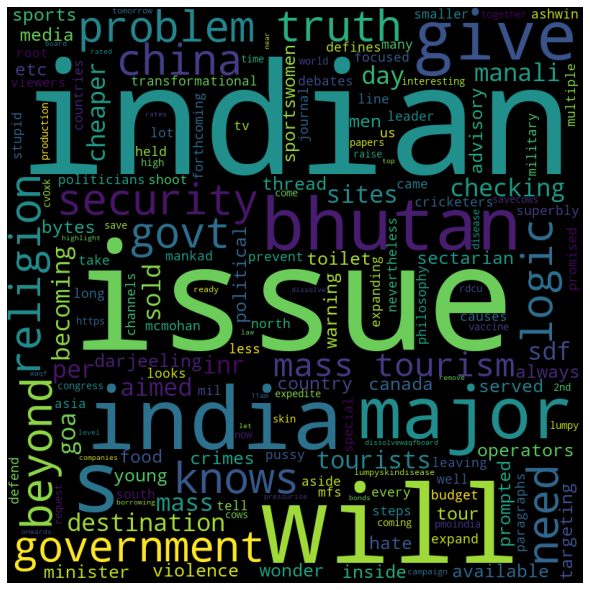

In [50]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

<h4 style='color:blue'>Based on the above word cloud and keywords in the tweet we can understand the topic of a respective tweet.So this helps in building a classification model to classify tweets based on their respective topic(keyword) such as cricket,politics,diseases,education,unemployement,government etc.
But we need very huge amount of data to be scraped from twitter inorder to perform natural language processing to get many classes and generate a label so that a classification model can be built to predict about a future tweet.Hence that is the main reason I didnt build any classification model here to classify tweets</h4>


**Sample Model Building**

In [55]:
twt

,Keyword,Account,Handle,Date,Time,Tweets,Replies,reTweets,Likes
0,"(sdf indian tourists, 0.6281)",Tenzing Lamsang,@TenzingLamsang,2022-09-25,02:07:59,The INR 1200 per day SDF for Indian tourists i...,485,1712,6738
1,"(sports minister, 0.5808)",Atishi,@AtishiAAP,2022-09-20,05:20:06,The Sports Minister of our country is always a...,110,406,738
2,"(violence canada targeting, 0.6441)",Allan Woods,@WoodsAllan,2022-09-23,17:20:51,What prompted the Indian government to issue a...,10,28,48
3,"(politicians transformational leader, 0.585)",Gopalakrishna P,@Gopalakrishna,2022-09-17,21:49:20,He knows Indian politicians so well....\n\nA t...,0,7,14
4,"(causes defend mankad, 0.5265)",धिरल,@_Dhiral,2022-09-25,06:22:16,Indian cricketers leaving Ashwin aside are pus...,1,3,13
5,"(truth viewers, 0.4461)",LDF Supporters,@LDFSupporters,2022-09-19,07:33:17,North Indian TV channels held multiple debates...,0,2,10
6,"(china expanding, 0.4735)",Brig V Mahalingam,@BrigMahalingam,2022-09-25,08:58:12,It will be a major security issue for us. But ...,0,2,8
7,"(focused logic religions, 0.5106)",Sutras & Stuff / Malcolm Keating,@sutrasandstuff,2022-09-21,10:37:24,A forthcoming special issue of the Journal of ...,0,0,6
8,"(lumpy skin disease, 0.461)",Ragini Saini,@raginisainii,2022-09-21,05:49:04,It’s high time now. We need to come together a...,0,15,4
9,"(campaign dissolvewaqfboard, 0.4818)",REALINDIAN,@RealIndian000,2022-09-25,06:54:41,Be Ready for Tomorrow's Campaign for #Dissolve...,0,10,1


In [61]:
df2 = twt[['Keyword','Account','Handle']]
df2

,Keyword,Account,Handle
0,"(sdf indian tourists, 0.6281)",Tenzing Lamsang,@TenzingLamsang
1,"(sports minister, 0.5808)",Atishi,@AtishiAAP
2,"(violence canada targeting, 0.6441)",Allan Woods,@WoodsAllan
3,"(politicians transformational leader, 0.585)",Gopalakrishna P,@Gopalakrishna
4,"(causes defend mankad, 0.5265)",धिरल,@_Dhiral
5,"(truth viewers, 0.4461)",LDF Supporters,@LDFSupporters
6,"(china expanding, 0.4735)",Brig V Mahalingam,@BrigMahalingam
7,"(focused logic religions, 0.5106)",Sutras & Stuff / Malcolm Keating,@sutrasandstuff
8,"(lumpy skin disease, 0.461)",Ragini Saini,@raginisainii
9,"(campaign dissolvewaqfboard, 0.4818)",REALINDIAN,@RealIndian000


In [82]:
df2['Keyword'] = df2['Keyword'].astype(str)
df2['Keyword'] = df2['Keyword'].apply(lambda x: x.split(',')[0])
df2['Keyword'] = df2['Keyword'].apply(lambda x:x.replace('(',""))
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,Keyword,Account,Handle
0,'sdf indian tourists',Tenzing Lamsang,@TenzingLamsang
1,'sports minister',Atishi,@AtishiAAP
2,'violence canada targeting',Allan Woods,@WoodsAllan
3,'politicians transformational leader',Gopalakrishna P,@Gopalakrishna
4,'causes defend mankad',धिरल,@_Dhiral
5,'truth viewers',LDF Supporters,@LDFSupporters
6,'china expanding',Brig V Mahalingam,@BrigMahalingam
7,'focused logic religions',Sutras & Stuff / Malcolm Keating,@sutrasandstuff
8,'lumpy skin disease',Ragini Saini,@raginisainii
9,'campaign dissolvewaqfboard',REALINDIAN,@RealIndian000
